In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
gid = "498497405546135552"
#gid = "801684107616890880"
#gid = "766059906558464000"
data_in = pd.read_csv("anonymous_graphs/"+gid+".dat",sep=" ")
#758390538311766016
a = list(data_in.time)

a = list(np.array(a) - min(a))

# decide the gap

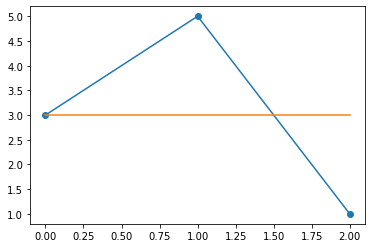

In [15]:
gap = 60*20
aa = [int(i/gap) for i in a]

u,c = np.unique(aa,return_counts=True)

plt.plot(u,c,"-o")
plt.plot([0,max(u)],[np.mean(c),np.mean(c)])

# Build the graphs

In [16]:
import networkx as nx


data_in = pd.read_csv("anonymous_graphs/"+gid+".dat",sep=" ")
gap = 60*20

In [17]:
graphs = []
G = nx.Graph()
c = 0
for t,a,b,l in data_in.to_numpy():
    t = int(t/gap)
    if t == c:
        G.add_edge(a,b)
    else:
        graphs.append(G)
        G = nx.Graph()
        G.add_edge(a,b)
        c = t

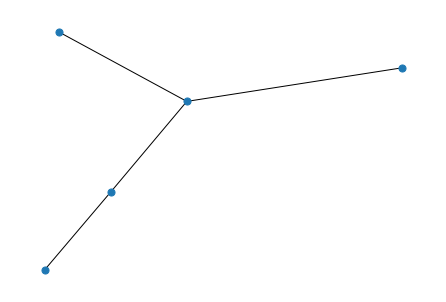

In [18]:
# aggregated graph
edge_list = data_in.to_numpy()[:,1:3]
G = nx.from_edgelist(edge_list)

pos = nx.spring_layout(G)
nx.draw(G,node_size=50,pos=pos)

IndexError: list index out of range

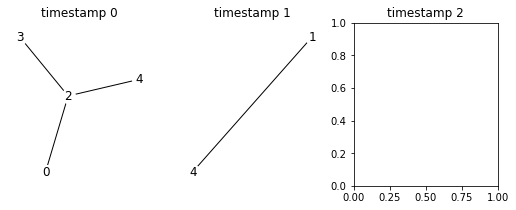

In [19]:
for i in range(0,25,5):
    plt.figure(figsize=(15,3))
    for j in range(0,5):
        plt.subplot(1,5,j+1)
        plt.title("timestamp " + str(i+j))
        nx.draw(graphs[i+j],node_size=200,node_color="white",with_labels=True)
        
    plt.show()